In [53]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data

In [54]:
# # Load the data from the csv file
def load_data(file_path):
    data = []

    with open(file_path) as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            data.append(row)
    return data

data = load_data('Data/insurance.csv')

In [55]:
print(type(data))

<class 'list'>


In [56]:
print(data[:3])

[{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}, {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}, {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}]


# creating the list of every column

In [57]:
age = []
sex = []
bmi = []
children = []

smoker = []
region = []
charges = []

In [58]:
def extract_data(age):
    for row in data:
        age.append(row['age'])
        
extract_data(age)

In [59]:
print(age[:3])

['19', '18', '28']


In [60]:
def extract_data(sex):
    for row in data:
        sex.append(row['sex'])

extract_data(sex)

In [61]:
print(sex[:3])

['female', 'male', 'male']


In [62]:
def extract_data(bmi):
    for row in data:
        bmi.append(row['bmi'])

extract_data(bmi)

In [63]:
print(bmi[:3])

['27.9', '33.77', '33']


In [64]:
def extract_data(children):
    for row in data:
        children.append(row['children'])
       
       
extract_data(children) 

In [65]:
print(children[:3])

['0', '1', '3']


In [66]:
def extract_data(smoker):
    for row in data:
        smoker.append(row['smoker'])

extract_data(smoker)

In [67]:
print(smoker[:3])

['yes', 'no', 'no']


In [68]:
def extract_data(region):
    for row in data:
        region.append(row['region'])
    
extract_data(region)

In [69]:
print(region[:3])

['southwest', 'southeast', 'southeast']


In [70]:
def extract_data(charges):
    for row in data:
        charges.append(row['charges'])

extract_data(charges)

In [71]:
print(charges[:3])

['16884.924', '1725.5523', '4449.462']


# Data zipping

In [72]:
zipped_data = list(zip(age, sex, bmi, children, smoker, region, charges))

In [73]:
zipped_df = pd.DataFrame(zipped_data, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])

In [74]:
print(zipped_data[:3])


[('19', 'female', '27.9', '0', 'yes', 'southwest', '16884.924'), ('18', 'male', '33.77', '1', 'no', 'southeast', '1725.5523'), ('28', 'male', '33', '3', 'no', 'southeast', '4449.462')]


In [75]:
print(type(zipped_df))

<class 'pandas.core.frame.DataFrame'>


In [76]:
print(zipped_df[:3])

  age     sex    bmi children smoker     region    charges
0  19  female   27.9        0    yes  southwest  16884.924
1  18    male  33.77        1     no  southeast  1725.5523
2  28    male     33        3     no  southeast   4449.462


# Step 2: Data Analysis

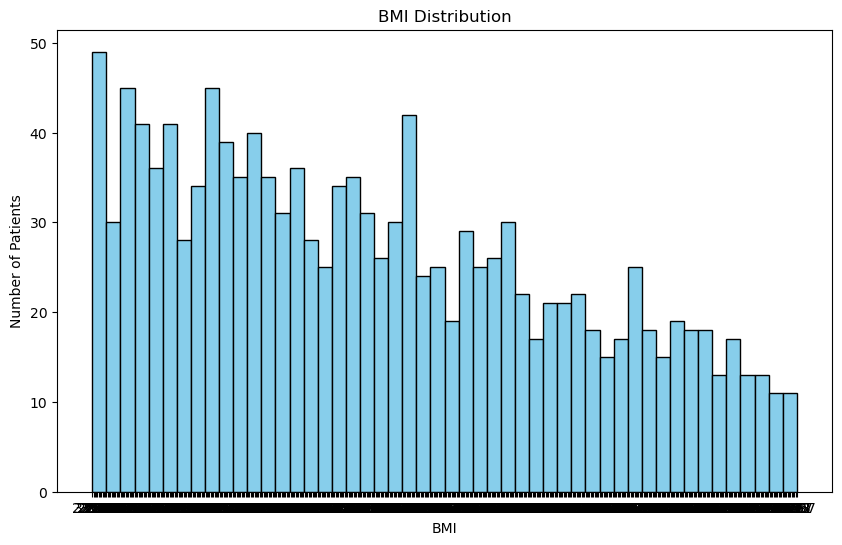

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(zipped_df['bmi'], bins=50, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.show()

### For smokers and non-smokers 

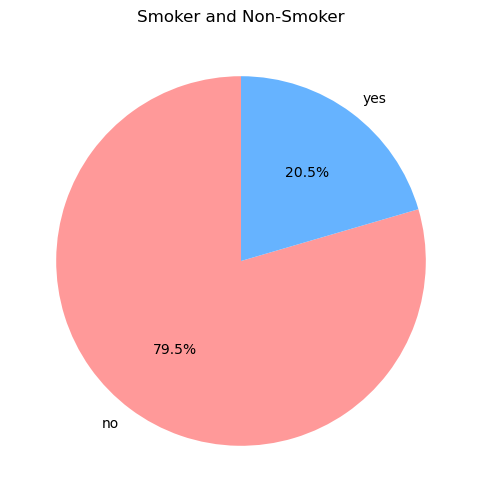

In [78]:
smoker_and_Nonsmoker_count = zipped_df['smoker'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(smoker_and_Nonsmoker_count, labels=smoker_and_Nonsmoker_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Smoker and Non-Smoker')
plt.show()

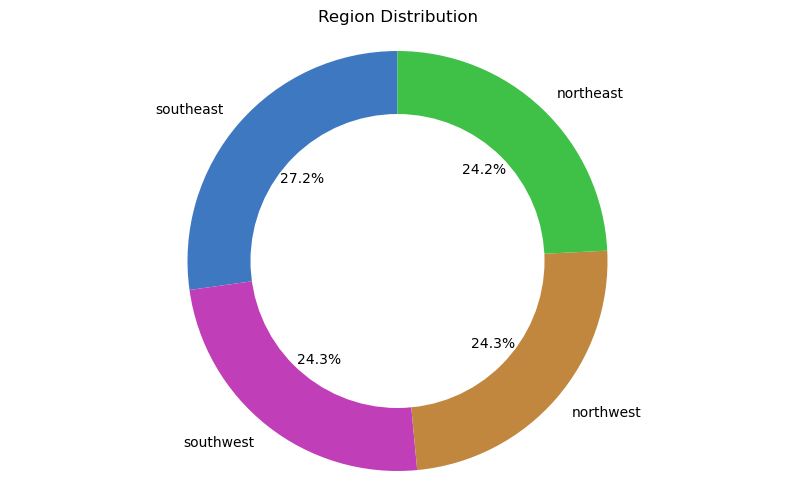

In [79]:
region_counts = zipped_df['region'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=['#3E78C1','#C13EB9', '#C1873E', '#3EC146'])

# Add a white circle at the center to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Region Distribution')
plt.axis('equal')
plt.show()

# Step 3: Result Analysis

### Average cost of insurance

In [80]:
print(charges[:10])

['16884.924', '1725.5523', '4449.462', '21984.47061', '3866.8552', '3756.6216', '8240.5896', '7281.5056', '6406.4107', '28923.13692']


In [81]:
# Calculate the average cost of insurance
zipped_df['charges'] = zipped_df['charges'].astype(float)
average_cost = zipped_df['charges'].mean()

# Print the average cost
print(f'Average cost of insurance: {average_cost:.2f} US dollars')

Average cost of insurance: 13270.42 US dollars


In [82]:
max_cost = zipped_df['charges'].max()

In [83]:
min_cost = zipped_df['charges'].min()
print(f'Maximum cost of insurance: {int(max_cost)} US dollars')
print(f'Minimum cost of insurance: {int(min_cost)} US dollars')

Maximum cost of insurance: 63770 US dollars
Minimum cost of insurance: 1121 US dollars


# Average cost for smokers and Non-smokers

In [84]:
# Average cost of insurance for smokers and non-smokers
average_cost_smoker = zipped_df[zipped_df['smoker'] == 'yes']['charges'].mean()
average_cost_non_smoker = zipped_df[zipped_df['smoker'] == 'no']['charges'].mean()
print(f'Average cost of insurance for smokers: {int(average_cost_smoker)} US dollars')

Average cost of insurance for smokers: 32050 US dollars


In [85]:
print(f'Average cost of insurance for non-smokers: {int(average_cost_non_smoker)} US dollars')

Average cost of insurance for non-smokers: 8434 US dollars


# difference of average cost between smokers and non-smokers


In [86]:
# difference of average cost between smokers and non-smokers
difference = average_cost_smoker - average_cost_non_smoker
print(f'Difference of average cost between smokers and non-smokers: {int(difference)} US dollars')

Difference of average cost between smokers and non-smokers: 23615 US dollars


# IF BMI is greater than 30, then the patient is obese


In [90]:
print(type(bmi))
print(bmi[:5])

<class 'list'>
['27.9', '33.77', '33', '22.705', '28.88']


In [92]:
obese_patients = zipped_df[zipped_df['bmi'].astype(float) > 30]
print(obese_patients)

     age     sex    bmi children smoker     region      charges
1     18    male  33.77        1     no  southeast   1725.55230
2     28    male     33        3     no  southeast   4449.46200
6     46  female  33.44        1     no  southeast   8240.58960
12    23    male   34.4        0     no  southwest   1826.84300
13    56  female  39.82        0     no  southeast  11090.71780
...   ..     ...    ...      ...    ...        ...          ...
1331  23  female   33.4        0     no  southwest  10795.93733
1332  52  female   44.7        3     no  southwest  11411.68500
1333  50    male  30.97        3     no  northwest  10600.54830
1334  18  female  31.92        0     no  northeast   2205.98080
1335  18  female  36.85        0     no  southeast   1629.83350

[705 rows x 7 columns]


In [98]:
obese_patients_count = obese_patients.shape[0]
print(f'The number of obese patients: {obese_patients_count}')

The number of obese patients: 705


In [99]:
print(f'The number of obese patients: {obese_patients_count}')

The number of obese patients: 705


# find The most expensive region for insurance

In [102]:
most_expensive_region = zipped_df.groupby('region')['charges'].mean().idxmax()
print(f'The most expensive region for insurance: {most_expensive_region}')

The most expensive region for insurance: southeast


In [103]:
most_cheapest_region = zipped_df.groupby('region')['charges'].mean().idxmin()
print(f'The most cheapest region for insurance: {most_cheapest_region}')

The most cheapest region for insurance: southwest


# Average cost of insurance for different regions


In [104]:
average_cost_region = zipped_df.groupby('region')['charges'].mean()
print(average_cost_region)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


### Find the patient with the highest insurance cost

In [114]:
highest_cost_patient = zipped_data[zipped_df['charges'].idxmax()]
print(highest_cost_patient)

('54', 'female', '47.41', '0', 'yes', 'southeast', '63770.42801')


In [115]:
lowest_cost_patient = zipped_data[zipped_df['charges'].idxmin()]
print(lowest_cost_patient)

('18', 'male', '23.21', '0', 'no', 'southeast', '1121.8739')
